In [119]:
import os
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import operator

In [120]:
# creating path
path = "F:/text classification project/20_newsgroups"
class_list = os.listdir(path)
len(class_list)

20

In [121]:
stop_words = set(stopwords.words('english'))  # set of stopwords
punctuation = list(punctuation) # list of punctuation

In [122]:
mapping = {}
for folder in class_list:
    files = os.listdir(path + "/" + folder)
    for file in files:
        f = open(path+"/"+folder+'/'+file,'r',encoding="ISO-8859-1")
        text = f.read() # here text is string
        text = re.compile('\w+').findall(text) # here white space removed and each word is in list 'text'.
        for each_word in text:
            if (each_word.lower() not in stop_words) and (each_word not in punctuation) and (len(each_word) >= 4) and (each_word.lower().isalpha()):
                mapping[each_word.lower()] = mapping.get(each_word.lower(),0) + 1 # updating each word count value
    print("Each word of ", folder, " class is added to dictionary")
print("All classes Done")
print(len(mapping))

Each word of  alt.atheism  class is added to dictionary
Each word of  comp.graphics  class is added to dictionary
Each word of  comp.os.ms-windows.misc  class is added to dictionary
Each word of  comp.sys.ibm.pc.hardware  class is added to dictionary
Each word of  comp.sys.mac.hardware  class is added to dictionary
Each word of  comp.windows.x  class is added to dictionary
Each word of  misc.forsale  class is added to dictionary
Each word of  rec.autos  class is added to dictionary
Each word of  rec.motorcycles  class is added to dictionary
Each word of  rec.sport.baseball  class is added to dictionary
Each word of  rec.sport.hockey  class is added to dictionary
Each word of  sci.crypt  class is added to dictionary
Each word of  sci.electronics  class is added to dictionary
Each word of  sci.med  class is added to dictionary
Each word of  sci.space  class is added to dictionary
Each word of  soc.religion.christian  class is added to dictionary
Each word of  talk.politics.guns  class is

In [123]:
mapp = {key:val for key, val in mapping.items() if val >= 5}

In [124]:
# Sorting Dictionary by value
sorted_dict = sorted(mapp.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_dict[:250])

[('news', 34309), ('cantaloupe', 26048), ('message', 21954), ('subject', 21589), ('lines', 20894), ('date', 20787), ('newsgroups', 20404), ('path', 20369), ('organization', 19840), ('state', 18842), ('would', 15997), ('ohio', 15887), ('writes', 14686), ('article', 13435), ('comp', 13101), ('references', 12981), ('talk', 12308), ('misc', 11892), ('sender', 11040), ('howland', 10981), ('reston', 10946), ('people', 10364), ('like', 10350), ('university', 9958), ('posting', 9793), ('nntp', 9377), ('know', 9173), ('host', 8934), ('think', 8315), ('usenet', 8308), ('zaphod', 8302), ('politics', 7869), ('windows', 7584), ('also', 7561), ('time', 7073), ('rutgers', 7014), ('harvard', 6923), ('near', 6868), ('good', 6308), ('system', 6267), ('crabapple', 6235), ('well', 6193), ('could', 6154), ('xref', 6064), ('even', 5731), ('europa', 5448), ('gtefsd', 5429), ('uunet', 5369), ('world', 5354), ('religion', 5351), ('make', 5191), ('many', 5130), ('christian', 5129), ('much', 5123), ('first', 510

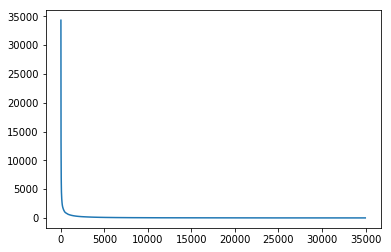

In [125]:
# plotting word vs its frequency graph
import matplotlib.pyplot as plt
frequency=[i[1] for i in sorted_dict]
plt.plot(frequency)
plt.show() # this plot is not clear so will try to plot again with less data points

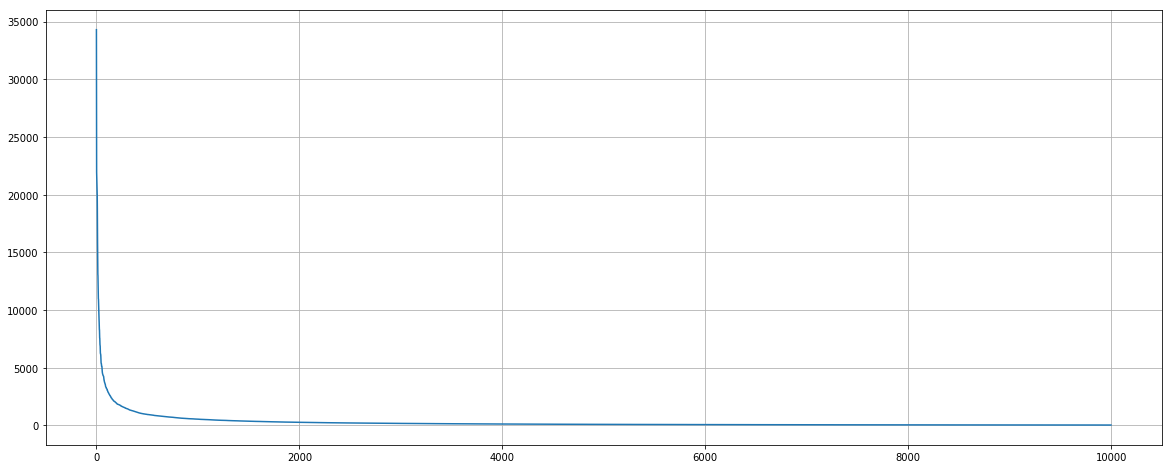

10000

In [126]:
# plotting with only top 10000 points
top_10000_words = sorted_dict[:10000]
frequency=[i[1] for i in top_10000_words]
top_10000_word = [i[0] for i in top_10000_words]
plt.figure(figsize=(20, 8))
plt.plot(frequency)
plt.grid()
plt.show()
len(top_10000_word)

In [127]:
import pandas as pd
top_10000_word.append('CLASSIFICATION') # appending Y or target col
df = pd.DataFrame(columns=top_10000_word)
df

,news,cantaloupe,message,subject,lines,date,newsgroups,path,organization,state,...,extras,troubles,hubble,stacks,pavo,utrecht,downtown,ding,inline,CLASSIFICATION


In [128]:
import pandas as pd
#dirData = []
for folder in class_list: # iterating through all folders
    files = os.listdir(path + "/" + folder)
    dirData = [[0]*len(top_10000_word)]
    for file in files: # iterating through all files
        row_data = [0]*len(top_10000_word)
        f = open(path+"/"+folder+'/'+file,'r',encoding ="ISO-8859-1") #opening that particular file
        text = f.read() # here text is string
        #text = re.compile('\w+').findall(text) # here white space removed and each word is in list named 'text'.
        for each_word in text.split(): # iterating through each word in text
            each_word = each_word.lower()
            if (each_word in top_10000_word): # if word is in top 10000 most occured word then increase count
                row_data[top_10000_word.index(each_word)] = row_data[top_10000_word.index(each_word)] + 1
        row_data[top_10000_word.index('CLASSIFICATION')] = folder
        dirData.append(row_data) # adding row data to dirdata
    tempDF = pd.DataFrame(dirData[1:], columns=top_10000_word) #converting into dataframe
    df = df.append(tempDF, ignore_index=True) #adding to final dataframe
    print(folder, "Done", len(df))

alt.atheism Done 1000
comp.graphics Done 2000
comp.os.ms-windows.misc Done 3000
comp.sys.ibm.pc.hardware Done 4000
comp.sys.mac.hardware Done 5000
comp.windows.x Done 6000
misc.forsale Done 7000
rec.autos Done 8000
rec.motorcycles Done 9000
rec.sport.baseball Done 10000
rec.sport.hockey Done 11000
sci.crypt Done 12000
sci.electronics Done 13000
sci.med Done 14000
sci.space Done 15000
soc.religion.christian Done 15997
talk.politics.guns Done 16997
talk.politics.mideast Done 17997
talk.politics.misc Done 18997
talk.religion.misc Done 19997


In [129]:
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [130]:
# converting target values to catagorical data
df["CLASSIFICATION"] = pd.Categorical(df.CLASSIFICATION)
df['TARGET'] = df.CLASSIFICATION.cat.codes
df = df.drop('CLASSIFICATION',axis=1)
df.head()

,news,cantaloupe,message,subject,lines,date,newsgroups,path,organization,state,...,extras,troubles,hubble,stacks,pavo,utrecht,downtown,ding,inline,TARGET
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,6,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# first doing with multinomialNB classifier

In [131]:
# using all inbulit functions
Y = df["TARGET"]
X = df[df.columns[:-1]].values
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.25,random_state=1)

clf = MultinomialNB()
clf.fit(X_train, Y_train)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       261
           1       0.63      0.75      0.68       248
           2       0.74      0.77      0.75       253
           3       0.68      0.72      0.70       260
           4       0.79      0.77      0.78       266
           5       0.85      0.77      0.81       265
           6       0.84      0.78      0.81       252
           7       0.86      0.85      0.85       223
           8       0.92      0.89      0.91       293
           9       0.94      0.94      0.94       245
          10       0.96      0.96      0.96       247
          11       0.91      0.92      0.91       248
          12       0.78      0.80      0.79       239
          13       0.92      0.88      0.90       236
          14       0.94      0.92      0.93       238
          15       0.83      0.87      0.85       233
          16       0.79      0.85      0.82       255
          17       0.92    

### getting good precision, recall & f1-score (about 81%)

# Creating our own Classifier

In [132]:
# fit function
def fit(X_train,Y_train):
    result = {} # initializinga our main dictionry
    result["total_data"] = 0 # count of total words
    class_values = set(Y_train) # all different target class
    for current_class in class_values: #iterating to each class
        result[current_class] = {}
        current_class_rows = (Y_train == current_class) # using boolean array to get data of only current class
        X_train_current = X_train[current_class_rows]
        Y_train_current = Y_train[current_class_rows]
        num_features = X_train.shape[1] # finding the total number of features
        result[current_class]["total_count"] = 0
        for j in range(num_features): # traversing through all features
            result[current_class][j] = X_train_current[:,j].sum() # finding the number of time the jth word appeared in current_class features
            result[current_class]["total_count"] += result[current_class][j] # updating the total_count value of that word
        result["total_data"] += result[current_class]["total_count"] # updating the total number of words
    return result

In [133]:
# defining probability function
def probability(dictionary, x, current_class):
    output = np.log(dictionary[current_class]["total_count"]) - np.log(dictionary["total_data"])  # using the multinomial Naive Bayes formula to calucate the probality for a particular class
    num_features = len(x) # finding the total number of features
    for j in range(num_features): # going through each features
        xj = x[j] 
        # using the multinomial Naive Bayes formula to calucate the probality also implementing the Laplace Correction
        current_class_with_xj = dictionary[current_class][j] + 1
        current_class_total_count = dictionary[current_class]["total_count"] + num_features
        current_xj_prob = np.log(current_class_with_xj) - np.log(current_class_total_count) # log probablities to avoid the final probablities to approaching zero
        output += current_xj_prob #updating output
    return output

In [134]:
# defining predictSinglePoint function
def predictSinglePoint(dictionary,x):
    classes = dictionary.keys() # storing the class names
    best_p = -1000
    best_class = -1
    first_run = True
    for current_class in classes: # traversing through each classes
        if (current_class == "total_data"): # not going to use this key for further calculations
            continue
        p_current_class = probability(dictionary, x, current_class) #getting probability
        if (first_run or p_current_class > best_p):
            best_p = p_current_class # updating best_class and probablity values based on above condition
            best_class = current_class
        first_run = False # for first run
    return best_class

In [135]:
#defining predict function
def predict(dictionary, X_test):
    y_pred = [] #initialzing pred list
    for x in X_test:
        x_class = predictSinglePoint(dictionary, x) #getting single point prediction
        y_pred.append(x_class) #adding to ypred
    return y_pred

In [136]:
dictionary = fit(X_train,Y_train) # calling fit function

In [137]:
import numpy as np
Y_pred = predict(dictionary,X_test) # calling predict function

In [138]:
#printing result
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       261
           1       0.61      0.74      0.67       248
           2       0.73      0.70      0.71       253
           3       0.68      0.69      0.68       260
           4       0.81      0.76      0.79       266
           5       0.84      0.76      0.80       265
           6       0.85      0.79      0.82       252
           7       0.85      0.83      0.84       223
           8       0.91      0.90      0.90       293
           9       0.95      0.93      0.94       245
          10       0.96      0.95      0.95       247
          11       0.87      0.91      0.89       248
          12       0.76      0.83      0.80       239
          13       0.92      0.87      0.89       236
          14       0.92      0.93      0.93       238
          15       0.82      0.88      0.85       233
          16       0.79      0.84      0.81       255
          17       0.93    

# Comparison
## From my self coded classifier I am getting precision, recall & f1-score as about 81% and from inbult classifier also I am getting the same as 81%

In [139]:
# creating dataset csv file
df.to_csv('text_Claasification_dataset.csv')